By: Marcus Brooks

**Notes for Myself**

The goal is to see which columns have the greatest impact on maximizing Average viewers. This can help aspiring streamers figure out what they need to focus on in order to grow their channel.

**Introduction**

Hello! This Data Science tutorial aims to guide you through all of the phases of the Data Science Pipeline. This will include Data Collection/Curation, Data Management/Representation, Exploratory Data Analysis, Hypothesis Testing and Machine Learning, Communication of Insights Attained. 

In this tutorial we used the data containing the Top 1000 Streamers on Twitch from Aayush Mishra on Kaggle (https://www.kaggle.com/aayushmishra1512/twitchdata).

**Set Up**

Found below are the packages needed to complete the tutorial. This code will import and install all the necessary dependencies for the tutorial.

In [558]:
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.regression.linear_model import WLS
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics 
from scipy.stats import ttest_rel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

**Data Collection/Curation**

Data collection/curation is the process of gathering the data and getting it into a workable format, such as a DataFrame. This will allow us to have the data in one place and use that data to answer relevant questions and evaluate outcomes.


Importing the Data:

The code below will create a Pandas DataFrame from CSV (Comma-Separated Values) file provided by Aayush Mishra. A DataFrame is a table with columns and rows. A column represents a category of data. A row represents an entry in the table. For example, we can look at the Channel column of the DataFrame and look at the entry in row 0 for the column Channel. This entry is xQcOW. So we can see that this column stores the channel name for each entry.

In [559]:
df = pd.read_csv("./twitchdata-update.csv",
                low_memory=False)
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


**Data Management/Representation**

Now, we must check if the DataFrame has any missing values. These missing values could be represented as nan. The code below checks the data frame to see if any nan values exist within any column and row. 

In [560]:
df.isnull().values.any()

False

It would seem that our DataFrame doesn't have any nan values, so there is no missing data! This is a nice outcome, but this isn't always the case.

In the case of missing data, there are a few things that you can do:

1. Remove all rows with missing data
2. Impute the missing data

-Removing all the rows with missing data-

This can have different effects depending on why your data is missing.

There are three types of missingness: 

    Missing Completely at Random (MCAR) - The probability that the data is missing is not dependent on any of the data, observed or unobserved.
    
    Missing at Random (MAR) - The probability of missing data is dependent on the observed data but not the unobserved data
    
    Missing Not at Random (MNAR) - The reason the data is missing is because of the data itself. 

-Imputing the missing data-

Imputation is the process of substiuting values in for missing data. There are multiple forms of imputation:

    Single imputation:

    Mean imputation: imputing the average from observed cases for
    all missing values of a variable

    Hot-deck imputation: imputing a value from another subject, or
    “donor,” that is most like the subject in terms of observed
    variables

    Cold-deck imputation: bring in other datasets

However, all of these methods impose too much precision, have uncertainty over what unobserved values actually are, and were developed before cheap computation.

Multiple imputation was developed to deal with noise during imputation. Multiple imputation generates several random values for each missing data point during imputation.



**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is the process of analyzing data sets to determine their characteristics. This is commonly done with data visualization methods. Exploratory Data Analysis aims to look at what the data can tell us beyond what is explored during the Hypothesis Testing phase. Often times this phase of the data science pipeline will allow us to discover patterns in the data that we might want to explore further. This process also allows us to check our assumptions that we had about the data. It is a good idea to try to understand the data first and get as many insights as possible before diving into the hypothesis testing phase.

Below is the code necessary to create what is called a "Spearman Correlation Matrix". This matrix allows us to see the correlation between our columns! We'll consider a strong correlation anything above the value 0.5. 

The brighter the color is for a correlation, the stronger the correlation is. We can see this by looking at all the values on the diagonal. These values are 1 and cream colored because each column is directly correlated with itself. Negative correlations are very dark. This can be seen by looking at the correlation between average viewers and Stream time, which has a value of -0.5.

[Text(0, 0.5, 'Watch time(Minutes)'),
 Text(0, 1.5, 'Stream time(minutes)'),
 Text(0, 2.5, 'Peak viewers'),
 Text(0, 3.5, 'Average viewers'),
 Text(0, 4.5, 'Followers'),
 Text(0, 5.5, 'Followers gained'),
 Text(0, 6.5, 'Views gained'),
 Text(0, 7.5, 'Partnered'),
 Text(0, 8.5, 'Mature')]

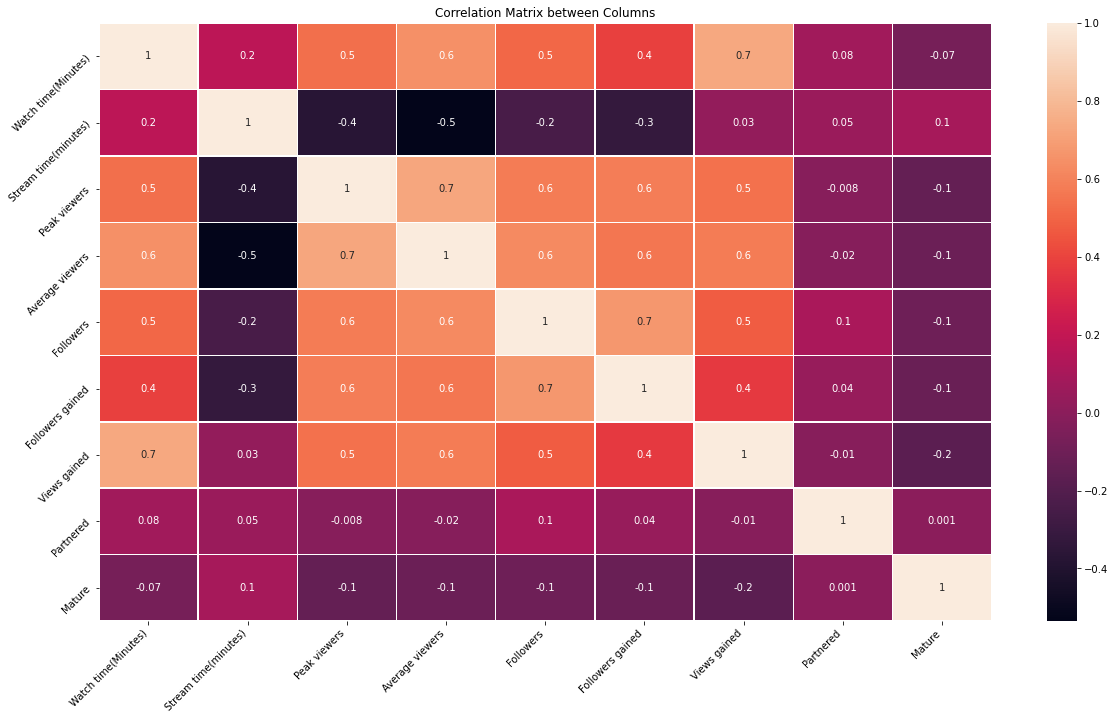

In [561]:
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr("spearman"), annot = True, fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

Some noteable correlations here are the strong correlations between Average Viewers and Followers, Watch Time, and Peak Viewers. These all have a value over 0.5 for correlation. We're choosing to ignore followers gained and views gained because those would come as a result of having a higher average viewership.

**Hypothesis Testing**

Hypothesis Testing is when you form some kind of theory or argument that explains some observed phenomenon within the data and you seek to prove or disprove this theory through experimentation. A crucial part of hypothesis testing is forming the null hypothesis (something you seek to disprove) and an alternative hypothesis (something you seek to prove).

In this tutorial our null hypothesis will be that there is no linearity between Average Viewers and Followers, Watch Time, and Peak Viewers.

Our alternative hypothesis will be that there is indeed linearity between Average Viewers and Followers, Watch Time, and Peak Viewers.

In [562]:
df2 = df

lm = LinearRegression()

ind = [[x] for x in df2['Watch time(Minutes)']]
dep = df2["Average viewers"]

lm.fit(ind, dep)

LinearRegression()

In [563]:
df2['watch residuals'] = df2['Average viewers'] - lm.predict(ind)

Text(0, 0.5, 'Average Viewers')

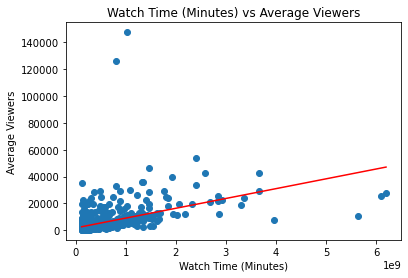

In [564]:
plt.scatter(x=df['Watch time(Minutes)'], y=df["Average viewers"])
plt.plot(ind, lm.predict(ind), "r")
plt.title("Watch Time (Minutes) vs Average Viewers")
plt.xlabel("Watch Time (Minutes)")
plt.ylabel("Average Viewers")

This plot seems to have a few outliers. These can be seen in the top left side of the plot, as well as in the bottom right corner. Lets remove those outliers and see what the plot looks like then!

Text(0, 0.5, 'Average Viewers')

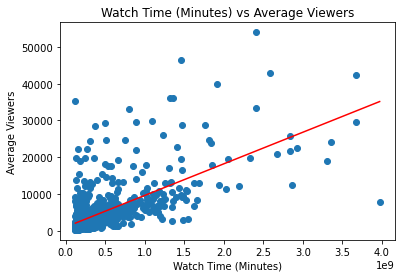

In [565]:


for i in range(1,4):
    toDrop = df2['Watch time(Minutes)'].idxmax()
    df2 = df2.drop(axis = 0, index = toDrop)
    
for i in range(1,3):
    toDrop = df2['Average viewers'].idxmax()
    df2 = df2.drop(axis = 0, index = toDrop)
    
ind = [[x] for x in df2['Watch time(Minutes)']]
dep = df2["Average viewers"].tolist()

lm.fit(ind, dep)

plt.scatter(x=df2['Watch time(Minutes)'], y=df2["Average viewers"])
plt.plot(ind, lm.predict(ind), "r")
plt.title("Watch Time (Minutes) vs Average Viewers")
plt.xlabel("Watch Time (Minutes)")
plt.ylabel("Average Viewers")

This plot is much easier to look at. Previously the outliers caused the plot to be very zoomed out and it caused a lot of overlap of points on the plot. Removing the outliers also has an effect on the linear regression, making the linear regression more accurate by allowing the linear regression to represent the bulk of the data instead of being influenced by a few outliers.

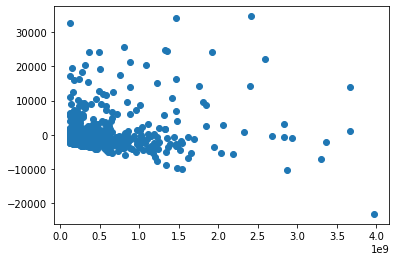

In [566]:
plt.scatter(df2['Watch time(Minutes)'], df2['watch residuals'])

In [567]:
fit = WLS(dep, ind).fit(cov_type='HC1')
print(fit.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.630
Model:                            WLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              292.5
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                    1.13e-57
Time:                        02:49:13   Log-Likelihood:                         -9786.8
No. Observations:                 995   AIC:                                  1.958e+04
Df Residuals:                     994   BIC:                                  1.958e+04
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Average Viewers')

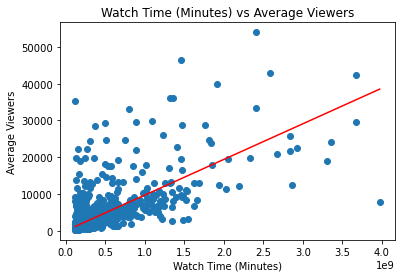

In [568]:
#x = df['Watch time(Minutes)']

#y = 0.0056*x







plt.scatter(x=df2['Watch time(Minutes)'], y=df2["Average viewers"])
#plt.plot(df['Watch time(Minutes)'], y, 'r')
plt.plot(ind, fit.predict(ind), "r")
plt.title("Watch Time (Minutes) vs Average Viewers")
plt.xlabel("Watch Time (Minutes)")
plt.ylabel("Average Viewers")

In [569]:
df2['ols watch residuals'] = df2['Average viewers'] - fit.predict(ind)

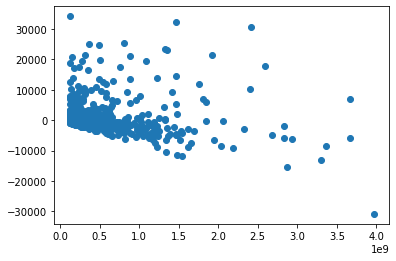

In [570]:
plt.scatter(df2['Watch time(Minutes)'], df2['ols watch residuals'])

Text(0.5, 1.0, 'Peak Viewers vs Average Viewers')

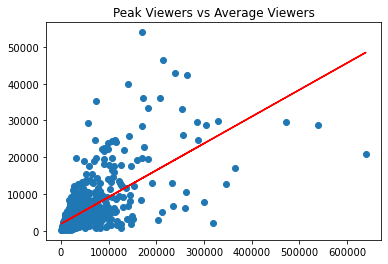

In [571]:
lm = LinearRegression()

ind = [[x] for x in df2['Peak viewers']]
dep = df2["Average viewers"]

lm.fit(ind, dep)

plt.scatter(x=df2['Peak viewers'], y=df2["Average viewers"])
plt.plot(ind, lm.predict(ind), "r")
plt.title("Peak Viewers vs Average Viewers")

Text(0.5, 1.0, 'Followers vs Average Viewers')

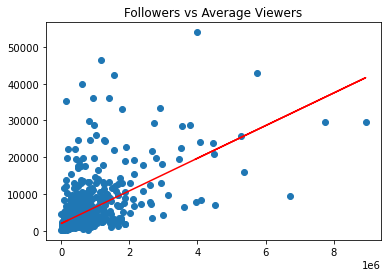

In [572]:
lm = LinearRegression()

ind = [[x] for x in df2['Followers']]
dep = df2["Average viewers"]

lm.fit(ind, dep)

plt.scatter(x=df2['Followers'], y=df2["Average viewers"])
plt.plot(ind, lm.predict(ind), "r")
plt.title("Followers vs Average Viewers")

**Machine Learning**



In [573]:
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,watch residuals
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,-19379.253545
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,-20720.043955
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,-32079.730987
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,-23079.910360
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,1000.196291
...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,6490.057968
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,-1820.935221
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,-2046.412421
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,-1459.377916


In [574]:
ind = df['Watch time(Minutes)']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

3443.1362399999994

In [576]:
ind = df['Stream time(minutes)']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

4369.358882333333

In [578]:
ind = df['Peak viewers']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

2634.05717

In [580]:
ind = df['Followers']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

3678.5396

In [582]:
ind = df['Followers gained']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

4192.632320000001

In [584]:
ind = df['Views gained']
dep = df['Average viewers']

rf = RandomForestRegressor()
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep)
ind_train = [[x] for x in ind_train]
ind_test = [[x] for x in ind_test]
rf.fit(ind_train, dep_train)
predicted = rf.predict(ind_test)
actual = np.array(dep_test)
mean_absolute_error(actual, predicted)

3641.6664400000004

===============================================================================================================================

In [586]:
kf = KFold(n_splits=10)
X = df['Watch time(Minutes)']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

-0.19320603791795676
0.04974647906050167
0.06259257588789002
-0.024852993326996753
-0.10977391269188863
-0.049014716995110286
-0.07893942580103563
-1.170998434510964
-0.05595648349653781
-0.002832193599147992


In [587]:
kf = KFold(n_splits=10)
X = df['Stream time(minutes)']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

-0.0029770206047392556
0.48383434820861504
0.2616268934801741
0.09822367531615328
-0.7082368774919472
-2.333230284707206
-3.4143075450177776
-8.378027530752897
-17.059931629584916
-0.5628592390214213


In [588]:
kf = KFold(n_splits=10)
X = df['Peak viewers']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

0.08454270755789195
0.5397060583956503
0.17760555544598045
0.06433786649165452
-0.5919073820820344
-0.06507402581359467
-0.862652417058652
-1.18831397500397
-0.11319011411911517
-0.19968197638660912


In [589]:
kf = KFold(n_splits=10)
X = df['Followers']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

-0.2764395061956093
-0.13302968906541435
-1.0163108064630126
-0.024516234403489046
-0.6145289327604033
-6.545096589895907
-0.5352103318710355
-5.075739219690785
-2.6717092189217677
-0.29201511608556574


In [590]:
kf = KFold(n_splits=10)
X = df['Followers gained']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

-0.5016817022104394
-0.6761303389797959
-0.4367892821871413
-0.7826458239927463
-0.6775962297105307
-25.912380912840646
-0.4902701555461506
-6.023258125691422
-1.507944861976653
-0.6517530851694706


In [591]:
kf = KFold(n_splits=10)
X = df['Views gained']
y = df['Average viewers']
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train = [[x] for x in X_train]
    X_test = [[x] for x in X_test]
    Y_train, Y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, Y_train)
    print(rf.score(X_test, Y_test))

-0.4596443223574367
-0.11653674425666405
-0.9598409193593691
-4.091338715324131
-2.502881156225157
-2.8706128264895585
-2.4325859413570248
-1.7500286617501475
-0.2238274757316583
-1.2423606344740263


======================================================================================================================

In [592]:
XO_train, XO_test, YO_train, YO_test = train_test_split(
   df['Views gained'], df['Average viewers'], test_size=0.5, shuffle=False
)

**Communication of Insights Attained**

This phase of the Data Science pipeline is where we get to communicate all of our findings from our hypothesis testing phase. 

Based on the results of the Mean Absolute Error test as well as the results we got from our score() function during our KFold, it would appear that peak viewers is the best predictor of average viewers.

In [ ]:
u